Name: Ying Wang

Github Username: Notrew

USC ID: 9965632493

In [1]:
#import packages
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from pylab import *

In [2]:
#read data
data, meta = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [3]:
#change class label to 0 and 1
df.loc[df["class"]==b'Abnormal',"b_class"]="1"
df.loc[df["class"]==b'Normal',"b_class"]="0"
cols=df.columns[[0,1,2,3,4,5,7,6]]
df1=df[cols].iloc[:,:-1]
df1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,b_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


#### (b) Pre-Processing and Exploratory data analysis:

#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

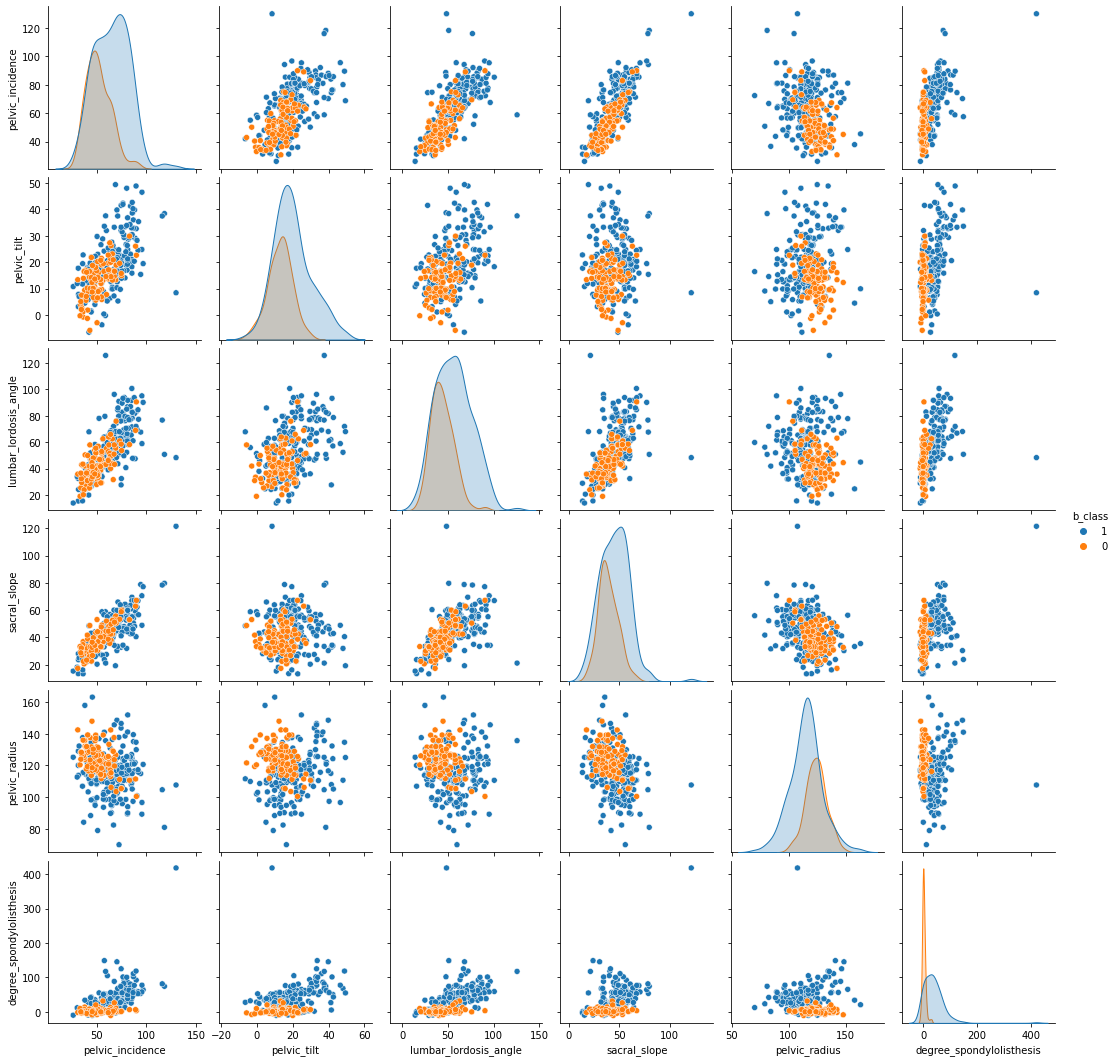

In [4]:
sns.pairplot(df1,hue="b_class")

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

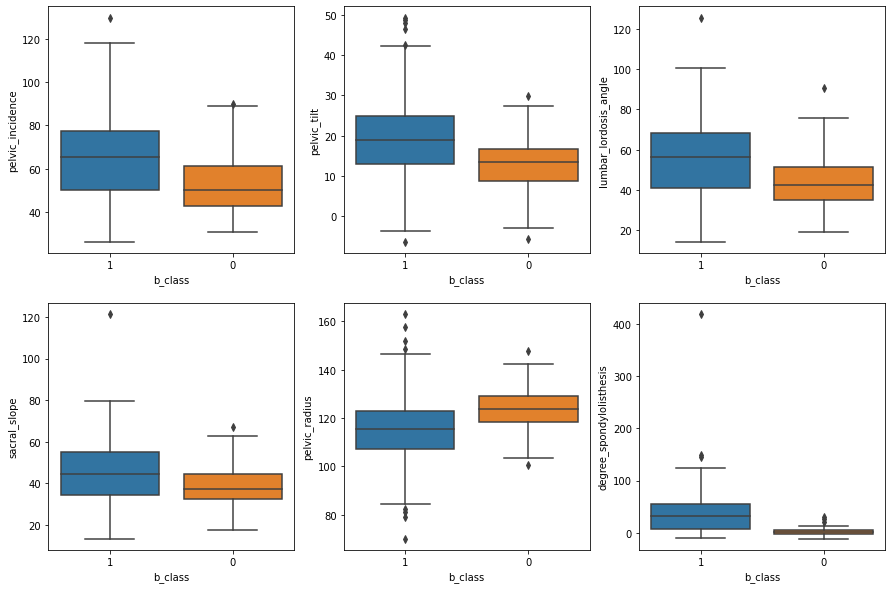

In [5]:
sns.set_context({'figure.figsize':[15, 10]})
cols=df1.columns
for i in range(len(cols)-1):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df1["b_class"],y=df1[cols[i]])
plt.plot

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [6]:
def create_train_test_set(df1,n1,df2,n2):
    train0=df1.head(n1) #first n1 rows of df1
    train1=df2.head(n2)
    train_set=pd.concat([train0,train1]) #concat training set together
    x_train=train_set[train_set.columns[:len(train_set.columns)-1]]
    y_train=train_set[train_set.columns[len(train_set.columns)-1]] 

    test0=df1.tail(-n1) #rest rows of df1
    test1=df2.tail(-n2)
    test_set=pd.concat([test0,test1])
    x_test=test_set[test_set.columns[:len(test_set.columns)-1]]
    y_test=test_set[test_set.columns[len(test_set.columns)-1]]
    
    return train_set,test_set,x_train,y_train,x_test,y_test

In [7]:
#select training set and test set
train_set,test_set,x_train,y_train,x_test,y_test=create_train_test_set(df1[df1["b_class"]=="0"],70
                                                                       ,df1[df1["b_class"]=="1"],140)

#### (c) Classification using KNN on Vertebral Column Data Set

#### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [8]:
#import knn packages
from sklearn.neighbors import KNeighborsClassifier,DistanceMetric
from sklearn.metrics import confusion_matrix,roc_curve,precision_score,f1_score

#### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling.  
#### Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? 

the most suitable k to make test error minimun is: k = 4 and at this time test error is: 0.06000000000000005


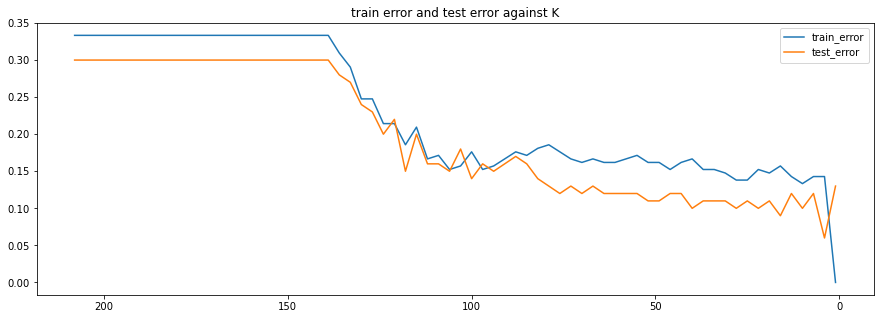

In [9]:
ks=[]
train_error=[]
test_error=[]

for i in range(208,0,-3):
    ks.append(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_accr=knn.score(x_train,y_train)
    train_error.append(1-train_accr)
    test_accr=knn.score(x_test,y_test)
    test_error.append(1-test_accr)

k_star=ks[test_error.index(min(test_error))] #find K* which makes the lowest test error
print("the most suitable k to make test error minimun is: k =",k_star,
      "and at this time test error is:",min(test_error))
#plot how errors change with different k, in reserve order
sns.set_context({'figure.figsize':[15, 5]})
plt.plot(ks,train_error,label="train_error")
plt.plot(ks,test_error,label="test_error")
plt.title("train error and test error against K")
plt.legend()
plt.gca().invert_xaxis() 
plt.show()

#### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

In [10]:
#according previous cell, k=4 is the most suitable k
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [11]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[25  5]
 [ 1 69]]


In [12]:
tn,fp,fn,tp=conf_matrix.ravel()
tpr=tp/sum(sum(conf_matrix))
tnr=tn/sum(sum(conf_matrix))
print("true positive rate is:",tpr,"and true negative rate is",tnr)

true positive rate is: 0.69 and true negative rate is 0.25


In [13]:
precision_score(y_test,y_pred,pos_label="1")

0.9324324324324325

In [14]:
f1_score(y_test,y_pred,pos_label="1")

0.9583333333333333

#### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. 
#### Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.
#### Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

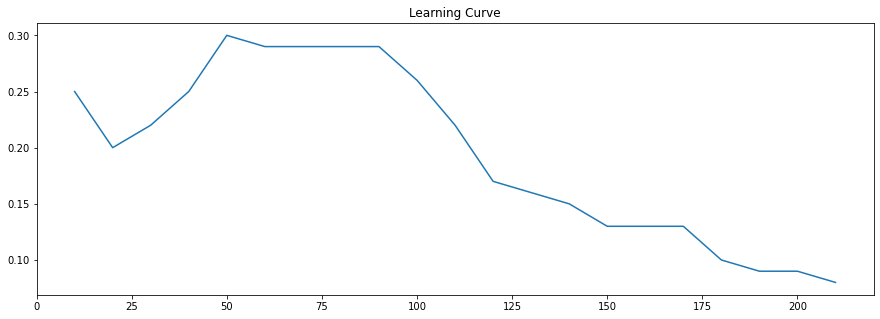

In [15]:
import math
Ns=[]
test_accr_against_k=[]
test_erro_against_N=[]

for N in range(210,9,-10):
    Ns.append(N)
    n1=int(math.floor(N/3)) #first ⌊N/3⌋ rows of class 0
    n2=N-n1 
    df2_0=train_set[train_set["b_class"]=="0"] #df of class 0
    df2_1=train_set[train_set["b_class"]=="1"]
    train_set_1,test_set_1,x_train_1,y_train_1,x_test_1,y_test_1=create_train_test_set(df2_0,n1,df2_1,n2)

    for i in range(1,N,5):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train_1,y_train_1) #training set with different size
        test_accr=knn.score(x_test,y_test) #same test set as (b)iii
        test_accr_against_k.append(test_accr)
    
    max_test_accr=max(test_accr_against_k)
    test_erro_against_N.append(1-max_test_accr) #find minimun test error against N
    test_accr_against_k.clear()

sns.set_context({'figure.figsize':[15, 5]})
plt.plot(Ns,test_erro_against_N)
plt.title("Learning Curve")
plt.show()

#### (d) Replace the Euclidean metric with the following metrics and test them. 
#### Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

#### i. Minkowski Distance:
    A. which becomes Manhattan Distance with p = 1.  

In [16]:
train_error_Manhattan=[]
test_error_Manhattan={}

for k in range(1,197,5):
    knn=KNeighborsClassifier(n_neighbors=k,p=1,metric="manhattan")
    knn.fit(x_train,y_train)
    train_accr=knn.score(x_train,y_train)
    train_error_Manhattan.append(1-train_accr)
    test_accr=knn.score(x_test,y_test)
    test_error_Manhattan[k]=1-test_accr
min_test_error_Manhattan=min(test_error_Manhattan.values())
ks_Manhattan= [k for k in test_error_Manhattan if test_error_Manhattan[k] == min_test_error_Manhattan]

print(ks_Manhattan,min_test_error_Manhattan)
k_Manhattan=min(ks_Manhattan[1:])
print(k_Manhattan)

[1, 6, 11, 26] 0.10999999999999999
6


    B.with log10(p) ∈ {0.1,0.2,0.3,...,1}. 
    In this case, use the k∗ you found for the Manhattan distance in (d)iA. What is the best log10(p)?

In [17]:
#use the k*=6 for Manhattan distance
train_error_logp=[]
test_error_against_p={}

for logp in np.arange(0.1,1.1,0.1):
    knn=KNeighborsClassifier(n_neighbors=k_Manhattan,p=10**logp,metric="minkowski")
    knn.fit(x_train,y_train)
    train_accr=knn.score(x_train,y_train)
    train_error_logp.append(1-train_accr)
    test_accr=knn.score(x_test,y_test)
    test_error_against_p[logp]=1-test_accr
min_test_error_logp=min(test_error_against_p.values())
best_logps=[p for p in test_error_against_p if test_error_against_p[p]==min_test_error_logp]

print(best_logps,min_test_error_logp)
best_logp=min(best_logps)
print(best_logp)

[0.6] 0.06000000000000005
0.6


    C. which becomes Chebyshev Distance with p → ∞ 

In [18]:
train_error_Chebyshev=[]
test_error_Chebyshev={}

for k in range(1,197,5):
    knn=KNeighborsClassifier(n_neighbors=k,metric="chebyshev")
    knn.fit(x_train,y_train)
    train_accr=knn.score(x_train,y_train)
    train_error_Chebyshev.append(1-train_accr)
    test_accr=knn.score(x_test,y_test)
    test_error_Chebyshev[k]=1-test_accr
min_test_error_Chebyshev=min(test_error_Chebyshev.values())
ks_Chebyshev= [k for k in test_error_Chebyshev if test_error_Chebyshev[k] == min_test_error_Chebyshev]

print(ks_Chebyshev,min_test_error_Chebyshev)
k_Chebyshev=min(ks_Chebyshev)
print(k_Chebyshev)

[16] 0.07999999999999996
16


#### ii. Mahalanobis Distance

In [19]:
#referene:https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics
train_error_mahalanobis=[]
test_error_mahalanobis={}

for k in range(1,197,5):
    knn=KNeighborsClassifier(n_neighbors=k,metric="mahalanobis",
                             metric_params={"VI":np.linalg.inv(np.cov(x_train.T))})
    knn.fit(x_train,y_train)
    train_accr=knn.score(x_train,y_train)
    train_error_mahalanobis.append(1-train_accr)
    test_accr=knn.score(x_test,y_test)
    test_error_mahalanobis[k]=1-test_accr
min_test_error_mahalanobis=min(test_error_mahalanobis.values())
ks_mahalanobis= [k for k in test_error_mahalanobis if test_error_mahalanobis[k] == min_test_error_mahalanobis]

print(ks_mahalanobis,min_test_error_mahalanobis)
k_mahalanobis=min(ks_mahalanobis[1:])
print(k_mahalanobis)

[1, 6] 0.16000000000000003
6


    summary

In [20]:
table=[{"k_Manhattan":min_test_error_Manhattan},
       {"k="+str(k_Manhattan)+"with log10(p)∈{0.1,0.2,...,1}":min_test_error_logp},
       {"k_Chebyshev":min_test_error_Chebyshev},
       {"k_mahalanobis":min_test_error_mahalanobis}]
index=["k*="+str(k_Manhattan),
       "best log10(p)="+str(best_logp),
       "k*="+str(k_Chebyshev),
       "k*="+str(k_mahalanobis)]
table=pd.DataFrame(table,index=index)
table

,k_Manhattan,"k=6with log10(p)∈{0.1,0.2,...,1}",k_Chebyshev,k_mahalanobis
k*=6,0.11,NaN,NaN,NaN
best log10(p)=0.6,NaN,0.06,NaN,NaN
k*=16,NaN,NaN,0.08,NaN
k*=6,NaN,NaN,NaN,0.16


#### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. 
#### Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

    Euclidean distance

In [21]:
train_error_unweighted_eu=[]
test_error_unweighted_eu={}

for k in range(1,197,5):
    knn=KNeighborsClassifier(n_neighbors=k,weights="distance")
    knn.fit(x_train,y_train)
    train_accr=knn.score(x_train,y_train)
    train_error_unweighted_eu.append(1-train_accr)
    test_accr=knn.score(x_test,y_test)
    test_error_unweighted_eu[k]=1-test_accr
min_test_error_euclidean=min(test_error_unweighted_eu.values())
ks_un_eu= [k for k in test_error_unweighted_eu if test_error_unweighted_eu[k] == min_test_error_euclidean]
k_un_eu=min(ks_un_eu)

print(k_un_eu,min_test_error_euclidean)

6 0.09999999999999998


    Manhattan distance

In [22]:
train_error_unweighted_manh=[]
test_error_unweighted_manh={}

for k in range(1,197,5):
    knn=KNeighborsClassifier(n_neighbors=k,metric="manhattan",p=1,weights="distance")
    knn.fit(x_train,y_train)
    train_accr=knn.score(x_train,y_train)
    train_error_unweighted_manh.append(1-train_accr)
    test_accr=knn.score(x_test,y_test)
    test_error_unweighted_manh[k]=1-test_accr
min_test_error_manh=min(test_error_unweighted_manh.values())
ks_un_manh= [k for k in test_error_unweighted_manh if test_error_unweighted_manh[k] == min_test_error_manh]
k_un_manh=min(ks_un_manh)

print(k_un_manh,min_test_error_manh)

26 0.09999999999999998


    Chebyshev distance

In [23]:
train_error_unweighted_che=[]
test_error_unweighted_che={}

for k in range(1,197,5):
    knn=KNeighborsClassifier(n_neighbors=k,metric="chebyshev",weights="distance")
    knn.fit(x_train,y_train)
    train_accr=knn.score(x_train,y_train)
    train_error_unweighted_che.append(1-train_accr)
    test_accr=knn.score(x_test,y_test)
    test_error_unweighted_che[k]=1-test_accr
min_test_error_che=min(test_error_unweighted_che.values())
ks_un_che= [k for k in test_error_unweighted_che if test_error_unweighted_che[k] == min_test_error_che]
k_un_che=min(ks_un_che)

print(k_un_che,min_test_error_che)

16 0.10999999999999999


#### (f) What is the lowest training error rate you achieved in this homework?

In [24]:
# In cii,diA,diB,diC,dii and e calculated traing error,and needed variabled are as follows:
# cii:train_error[],test_error[],k_star
# diA:train_error_Manhattan[],min_test_error_Manhattan,k_Manhattan
# diB:best_logp,train_error_logp[],min_test_error_logp,k_Manhattan
# diC:train_error_Chebyshev[],min_test_error_Chebyshev,k_Chebyshev
# dii:train_error_mahalanobis[],min_test_error_mahalanobis,k_mahalanobis
# e1:train_error_unweighted_eu[],min_test_error_euclidean,k_un_eu
# e2:train_error_unweighted_manh[],min_test_error_manh,k_un_manh
# e3:train_error_unweighted_che[],min_test_error_che,k_un_che

distance_type=["Unweighted Euclidean Distance",
               "Unweighted Manhattan Distance",
               "Unweighted Minkowski Distance with log10(p)="+str(best_logp),
               "Unweighted Chebyshev Distance",
               "Unweighted Mahalanobis Distance",
               "Weighted Euclidean Distance",
               "Weighted Manhattan Distance",
               "Weighted Chebyshev Distance"]
optimal_k=[k_star,k_Manhattan,k_Manhattan,k_Chebyshev,k_mahalanobis,k_un_eu,k_un_manh,k_un_che]
min_test_error=[min(test_error),min_test_error_Manhattan,min_test_error_logp,min_test_error_Chebyshev,
               min_test_error_mahalanobis,min_test_error_euclidean,min_test_error_mahalanobis,min_test_error_che]
min_train_error=[min(train_error),min(train_error_Manhattan),min(train_error_logp),min(train_error_Chebyshev),
                 min(train_error_mahalanobis),min(train_error_unweighted_eu),min(train_error_unweighted_manh),
                min(train_error_unweighted_che)]
table_dict={"Distance":distance_type,"Optimal K":optimal_k,
            "min test error":min_test_error,"min_train_error(not necessarily for the same K*)":min_train_error}#,"min_train_error":min_train_error
sum_table=pd.DataFrame(table_dict)
sum_table


,Distance,Optimal K,min test error,min_train_error(not necessarily for the same K*)
0,Unweighted Euclidean Distance,4,0.06,0.000000
1,Unweighted Manhattan Distance,6,0.11,0.000000
2,Unweighted Minkowski Distance with log10(p)=0.6,6,0.06,0.133333
3,Unweighted Chebyshev Distance,16,0.08,0.000000
4,Unweighted Mahalanobis Distance,6,0.16,0.000000
5,Weighted Euclidean Distance,6,0.10,0.000000
6,Weighted Manhattan Distance,26,0.16,0.000000
7,Weighted Chebyshev Distance,16,0.11,0.000000


throughout the homework, the best test error occurs in Unweighted Euclidean Distance and Unweighted Minkowski Distance with log10(p)=0.6 and it equals 0.06.

however, as for the minimum traing error, we can see most of our min_train_error is 0. Taking the first one as example, the k makes min_train_error equals 0 is k=1, so that the result model may overfit our traing data. It's not what we want.